In [64]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree
import dataframe_image as dfi

In [65]:
d = {'category': ['hiphop', 'hiphop', 'hiphop', 'hiphop', 'hiphop', 'jazz', 'jazz', 'jazz'], 
     'track':    ['h1', 'h2', 'h3', 'h4', 'h5', 'j1', 'j2', 'j3'],
     'feature_danceability' : [0.949, 0.743, 0.913, 0.810, 0.434, 0.654, 0.593, 0.234],
     'feature_acousticness' : [0.132, 0.234, 0.394, 0.504, 0.198, 0.534, 0.312, 0.341],
     'label'                : [1, 1, 1, 1, 1, 0, 0, 0]}
df = pd.DataFrame(data=d)

df

,category,track,feature_danceability,feature_acousticness,label
0,hiphop,h1,0.949,0.132,1
1,hiphop,h2,0.743,0.234,1
2,hiphop,h3,0.913,0.394,1
3,hiphop,h4,0.810,0.504,1
4,hiphop,h5,0.434,0.198,1
5,jazz,j1,0.654,0.534,0
6,jazz,j2,0.593,0.312,0
7,jazz,j3,0.234,0.341,0


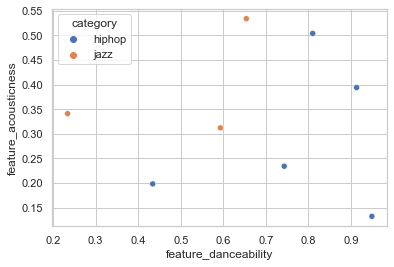

In [67]:
sns.set(style="whitegrid")
sns.scatterplot(data = df, x = "feature_danceability", y = "feature_acousticness", hue="category");

First Iteration 

In [68]:
# best possible Gini for danceability

threshold_array = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
#threshold_array = [0.4] 
hiphop          = 0
jazz            = 0

# best split
best_treshold = 0
best_gain     = 1
best_left     = 0
best_right    = 0

for t in threshold_array:

    left  = df.loc[df['feature_danceability'] < t] 
    right = df.loc[df['feature_danceability'] > t]    

    if len(left.index) == 0 or len(right.index) == 0:
        continue
    
    hiphop = 0
    jazz   = 0
    
    # gini left
    for i, row in enumerate(left.values):
        # hiphop
        if row[4] == 1:
            hiphop = hiphop + 1
        # jazz
        else: 
            jazz   = jazz + 1

    gini_left = 1 - pow((hiphop/len(left.index)), 2) - pow((jazz/len(left.index)), 2)

    hiphop = 0
    jazz   = 0

    # gini right
    for i, row in enumerate(right.values):
        # hiphop
        if row[4] == 1:
            hiphop = hiphop + 1
        # jazz
        else: 
            jazz   = jazz + 1
    
    gini_right = 1 - pow((hiphop/len(right.index)), 2) - pow((jazz/len(right.index)), 2)

    gain = (len(left.index)/len(df.index)) * gini_left + (len(right.index)/len(df.index)) * gini_right

    if gain < best_gain:
        best_gain       = gain
        best_treshold   = t
        best_left       = gini_left
        best_right      = gini_right

print(best_gain)
print(best_treshold)

0.1875
0.7


In [69]:
# best possible Gini for danceability

threshold_array = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
#threshold_array = [0.4] 
hiphop          = 0
jazz            = 0

# best split
best_treshold = 0
best_gain     = 1
best_left     = 0
best_right    = 0

for t in threshold_array:

    left  = df.loc[df['feature_acousticness'] < t] 
    right = df.loc[df['feature_acousticness'] > t]    

    if len(left.index) == 0 or len(right.index) == 0:
        continue
    
    hiphop = 0
    jazz   = 0
    
    # gini left
    for i, row in enumerate(left.values):
        # hiphop
        if row[4] == 1:
            hiphop = hiphop + 1
        # jazz
        else: 
            jazz   = jazz + 1

    gini_left = 1 - pow((hiphop/len(left.index)), 2) - pow((jazz/len(left.index)), 2)

    hiphop = 0
    jazz   = 0

    # gini right
    for i, row in enumerate(right.values):
        # hiphop
        if row[4] == 1:
            hiphop = hiphop + 1
        # jazz
        else: 
            jazz   = jazz + 1
    
    gini_right = 1 - pow((hiphop/len(right.index)), 2) - pow((jazz/len(right.index)), 2)

    gain = (len(left.index)/len(df.index)) * gini_left + (len(right.index)/len(df.index)) * gini_right

    if gain < best_gain:
        best_gain       = gain
        best_treshold   = t
        best_left       = gini_left
        best_right      = gini_right

print(best_gain)
print(best_treshold)

0.3
0.3


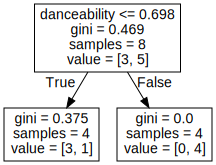

In [70]:
# build regression tree

# input values
features = ['feature_danceability']
Y = df['label']
X = df[features]

# build tree
dt = DecisionTreeClassifier(max_depth = 1)
dt.fit(X, Y)

# display
dot_data = tree.export_graphviz(
    dt,
    feature_names = ['danceability']
    )
graph = graphviz.Source(dot_data)

graph

Second Iteration

In [71]:
# right leaf is homogenous 

# -> no further actions required 

In [72]:
# left leaf is not homogenous and has to be processed further

df_second_iteration = df.loc[df['feature_danceability'] < 0.700] 

df_second_iteration


,category,track,feature_danceability,feature_acousticness,label
4,hiphop,h5,0.434,0.198,1
5,jazz,j1,0.654,0.534,0
6,jazz,j2,0.593,0.312,0
7,jazz,j3,0.234,0.341,0


In [76]:
export = df_second_iteration

dfi.export(export, 'second_iteration_dataset.png')

[0124/194616.466816:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/8l/bk7n5w8s3751wy49rg27zv1h0000gn/T/: Operation not permitted (1)
[0124/194616.469548:ERROR:file_io.cc(94)] ReadExactly: expected 8, observed 0
[0124/194616.471066:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/8l/bk7n5w8s3751wy49rg27zv1h0000gn/T/: Operation not permitted (1)
[0124/194616.991609:INFO:headless_shell.cc(653)] Written to file /var/folders/8l/bk7n5w8s3751wy49rg27zv1h0000gn/T/tmp5c37b0ok/temp.png.


In [73]:
# best possible Gini for danceability

threshold_array = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
#threshold_array = [0.4] 
hiphop        = 0
jazz          = 0

# best split
best2_treshold = 0
best2_gain     = 1
best2_left     = 0
best2_right    = 0

for t in threshold_array:

    left  = df_second_iteration.loc[df['feature_acousticness'] < t] 
    right = df_second_iteration.loc[df['feature_acousticness'] > t]    

    if len(left.index) == 0 or len(right.index) == 0:
        continue
    
    hiphop = 0
    jazz   = 0
    
    # gini left
    for i, row in enumerate(left.values):
        # hiphop
        if row[4] == 1:
            hiphop = hiphop + 1
        # jazz
        else: 
            jazz   = jazz + 1

    gini_left = 1 - pow((hiphop/len(left.index)), 2) - pow((jazz/len(left.index)), 2)

    hiphop = 0
    jazz   = 0

    # gini right
    for i, row in enumerate(right.values):
        # hiphop
        if row[4] == 1:
            hiphop = hiphop + 1
        # jazz
        else: 
            jazz   = jazz + 1
    
    gini_right = 1 - pow((hiphop/len(right.index)), 2) - pow((jazz/len(right.index)), 2)

    gain = (len(left.index)/len(df_second_iteration.index)) * gini_left + (len(right.index)/len(df_second_iteration.index)) * gini_right

    if gain < best_gain:
        best2_gain       = gain
        best2_treshold   = t
        best2_left       = gini_left
        best2_right      = gini_right

print(best2_gain)
print(best2_treshold)

0.0
0.3


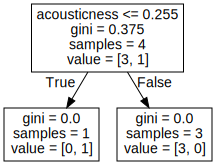

In [74]:
# build regression tree

# input values
features = ['feature_acousticness']
Y = df_second_iteration['label']
X = df_second_iteration[features]

# build tree
dt2 = DecisionTreeClassifier(max_depth = 1)
dt2.fit(X, Y)

# display
dot_data = tree.export_graphviz(
    dt2,
    feature_names = ['acousticness']
    )
graph = graphviz.Source(dot_data)

graph

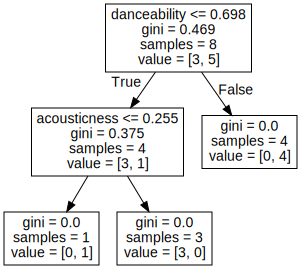

In [75]:
# overall calculation 

# build regression tree

# input values
features = ['feature_danceability', 'feature_acousticness']
Y = df['label']
X = df[features]

# build tree
dt3 = DecisionTreeClassifier(max_depth = 3)
dt3.fit(X, Y)

# display
dot_data = tree.export_graphviz(
    dt3,
    feature_names = ['danceability', 'acousticness']
    )
graph = graphviz.Source(dot_data)

graph